In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [28]:
tetrahymena = pd.read_csv("tetrahymena2.tsv",sep='\t')   # read the datafile using the read_csv function from the pandas library 

In [29]:
tetrahymena

,conc,diameter,culture
0,631048,21.140792,1
1,592007,21.498718,2
2,562977,21.352325,3
3,475069,20.903928,4
4,461040,21.637071,5
...,...,...,...
97,23855,23.433570,47
98,22126,23.448322,48
99,13833,24.321162,49
100,12963,24.434216,50


In [30]:
tetrahymena.query('diameter > 19.2 & diameter< 26.0')   # so I know after the filtering, 4 data points will be eliminated 

,conc,diameter,culture
0,631048,21.140792,1
1,592007,21.498718,2
2,562977,21.352325,3
3,475069,20.903928,4
4,461040,21.637071,5
...,...,...,...
97,23855,23.433570,47
98,22126,23.448322,48
99,13833,24.321162,49
100,12963,24.434216,50


In [8]:
#filter out excessively small and large cells with diameter <= 19.2 or >= 26.0

In [33]:
T1=tetrahymena[tetrahymena['diameter'] < 26.0]  # T1 is a new dataframe which contains data for diameters below 26.0, i.e., the ones equal to or greater than 26.0 are eliminated 
T1

,conc,diameter,culture
0,631048,21.140792,1
1,592007,21.498718,2
2,562977,21.352325,3
3,475069,20.903928,4
4,461040,21.637071,5
...,...,...,...
97,23855,23.433570,47
98,22126,23.448322,48
99,13833,24.321162,49
100,12963,24.434216,50


In [36]:
T2=T1[T1['diameter'] >19.2]   # T2 is a new dataframe in which rows with diameter equal to or less than 19.2 are eliminated 
T2  # T2 is the filtered dataframe 

,conc,diameter,culture
0,631048,21.140792,1
1,592007,21.498718,2
2,562977,21.352325,3
3,475069,20.903928,4
4,461040,21.637071,5
...,...,...,...
97,23855,23.433570,47
98,22126,23.448322,48
99,13833,24.321162,49
100,12963,24.434216,50


In [37]:
#(3) use the mean concentration and diameter over the technical replicates. (This is to remove a statistical issue called pseudo-replication.)

T3=T2.groupby('culture').mean().reset_index()   # this function will take a mean over the technical replicates 

In [52]:
#We need to take an average of the of the concentration and diameter data to avoid pseudoreplication. This is when is looks like 
#replication has been done but actually the replicates are highly correlated with other data and hence cannot be treated as 
#independent replicates. Each replicate is coming from one culture. These are technical replicates which need to be averaged out 
#so for each culture condition, there should be one concentration and one diameter reading. Incorrectly treating pseudoreplicates as 
#independent experimental units causes incorrect data analysis. 

In [38]:
T3

,culture,conc,diameter
0,1,631155.5,21.166891
1,2,592097.0,21.374168
2,3,562915.0,21.359864
3,4,475049.5,20.906823
4,5,461040.5,21.548492
5,6,416113.0,21.222879
6,7,384960.5,20.276008
7,8,320976.0,22.696857
8,9,301930.5,21.450353
9,10,199006.5,22.228682


In [39]:
#create a scatter plot of concentration versus diameter. Save as a pdf.

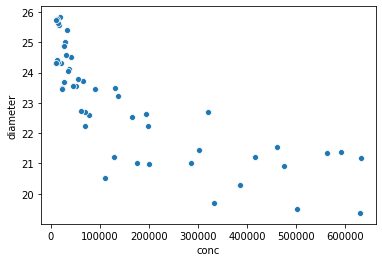

In [53]:
scatterplot1=sns.scatterplot(T3.conc, T3.diameter)
fig = scatterplot1.get_figure()
fig.savefig("scatterplot1_sm8847.pdf")

In [ ]:
Analysis of the linear scatterplot: An inverse, non_linear relationship between concentration and diameter is evident. 

In [43]:
#create new columns "log_concentration" and "log_diameter" that have the natural log of
#concentration and diameter respectively.

In [49]:
tetrahymena1= T3.assign(log_concentration=np.log(T3['conc']))  # assign function from pandas is very useful to get a new column using data from exisiting columns 
tetrahymena1

,culture,conc,diameter,log_concentration
0,1,631155.5,21.166891,13.355308
1,2,592097.0,21.374168,13.291426
2,3,562915.0,21.359864,13.240884
3,4,475049.5,20.906823,13.071174
4,5,461040.5,21.548492,13.041241
5,6,416113.0,21.222879,12.938712
6,7,384960.5,20.276008,12.860896
7,8,320976.0,22.696857,12.679122
8,9,301930.5,21.450353,12.617952
9,10,199006.5,22.228682,12.201093


In [46]:
tetrahymena2=tetrahymena1.assign(log_diameter=np.log(tetrahymena1['diameter']))
tetrahymena2

,culture,conc,diameter,log_concentration,log_diameter
0,1,631155.5,21.166891,13.355308,3.052438
1,2,592097.0,21.374168,13.291426,3.062183
2,3,562915.0,21.359864,13.240884,3.061514
3,4,475049.5,20.906823,13.071174,3.040076
4,5,461040.5,21.548492,13.041241,3.070306
5,6,416113.0,21.222879,12.938712,3.055080
6,7,384960.5,20.276008,12.860896,3.009438
7,8,320976.0,22.696857,12.679122,3.122226
8,9,301930.5,21.450353,12.617952,3.065741
9,10,199006.5,22.228682,12.201093,3.101383


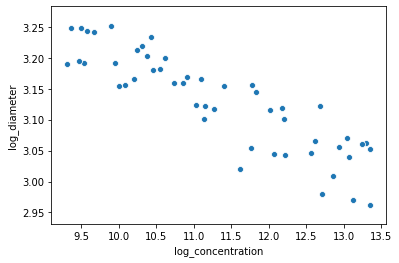

In [54]:
scatterplot2=sns.scatterplot(tetrahymena2.log_concentration, tetrahymena2.log_diameter)
fig2 = scatterplot2.get_figure()
fig2.savefig("scatterplot2_sm8847.pdf")

In [59]:
#Analysis of the plot
#When the diameter and concentration data are log transformed, we see a nicer plot which shows a linear relationship between the
#x and y variables. Hence, a power law relation is expected between diameter and concentration. 
#The log data transformation helped to better interpret the graph and it will also help meet the assumptions of a suitable 
#statistical inference model 